In [6]:
import nltk 
import pandas as pd 
import numpy as np
import sklearn 
import seaborn as sns

In [106]:
df = pd.read_csv("imdb.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [107]:
df['sentiment'].replace('positive',1,inplace=True)
df['sentiment'].replace('negative',0,inplace=True)

In [108]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [109]:
df = df.sample(n=10000, random_state=42)
df

,review,sentiment
33553,I really liked this Summerslam due to the look...,1
9427,Not many television shows appeal to quite as m...,1
199,The film quickly gets to a major chase scene w...,0
12447,Jane Austen would definitely approve of this o...,1
39489,Expectations were somewhat high for me when I ...,0
...,...,...
28567,Although Casper van Dien and Michael Rooker ar...,0
25079,I liked this movie. I wasn't really sure what ...,1
18707,Yes non-Singaporean's can't see what's the big...,1
15200,"As far as films go, this is likable enough. En...",0


<AxesSubplot: xlabel='sentiment', ylabel='count'>

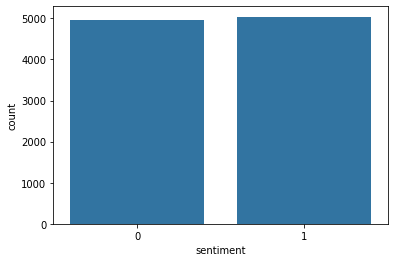

In [110]:
sns.countplot(x='sentiment', data=df)
# plt.title("Sentiment distribution")

In [111]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove <br /> tags
    text = re.sub("<br />", "", text)
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Filter out stopwords
    filtered_text = [w for w in tokens if not w in stop_words]
    
    # Initialize the stemmer
    stemmer = PorterStemmer()
    
    # Apply stemming to the filtered text
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    
    # Join the stemmed words into a single string
    return " ".join(stemmed_text)

In [ ]:
df['review'] = df['review'].apply(preprocess)

In [ ]:
df

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['review']
Y = df['sentiment']

vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [105]:
x_train = x_train.toarray()
x_test = x_test.toarray()

MemoryError: Unable to allocate 3.29 GiB for an array with shape (7000, 63143) and data type float64

In [69]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=10, epochs=4)

D:\Anaconda\envs\pytorch\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6547 - loss: 0.6200
Epoch 2/4
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9320 - loss: 0.2338
Epoch 3/4
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9594 - loss: 0.1168
Epoch 4/4
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9754 - loss: 0.0706


In [70]:
# Load the test example
sample_review = "This movie was worst! "


processed_review = preprocess(sample_review)
stemmed_review = stemming(processed_review)

X_test = vect.transform([stemmed_review])

X_test_dense = X_test.toarray()

# Make predictions
prediction = model.predict(X_test_dense)

# Display the prediction
if prediction[0] >= 0.5:
    print("Predicted sentiment: Positive")
else:
    print("Predicted sentiment: Negative")
print("Confidence score:", prediction[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted sentiment: Negative
Confidence score: [0.0017]
